In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [2]:
#Data reading
df = pd.read_csv("worldcoin-org_2023-07-24_2024-05-13.csv")
df

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-05-12,2024-05-13,765.162215,794.738781,758.432278,786.253298,9.331902e+10,1.635644e+11
1,2024-05-11,2024-05-12,724.398667,795.178822,721.563159,760.759065,1.361883e+11,1.596975e+11
2,2024-05-10,2024-05-11,739.417949,800.692547,707.797596,719.319684,1.277384e+11,1.561841e+11
3,2024-05-09,2024-05-10,708.778239,757.156844,708.446038,744.046408,1.157283e+11,1.499111e+11
4,2024-05-08,2024-05-09,783.298361,784.752847,690.718804,708.496971,1.322596e+11,1.544619e+11
...,...,...,...,...,...,...,...,...
289,2023-07-28,2023-07-29,272.412629,293.106284,270.623024,292.196668,6.144979e+10,2.986835e+10
290,2023-07-27,2023-07-28,294.276033,302.620373,274.856671,276.183124,9.694813e+10,3.038774e+10
291,2023-07-26,2023-07-27,300.593491,328.818293,288.924853,295.806895,1.937506e+11,3.235939e+10
292,2023-07-25,2023-07-26,285.010733,316.747323,251.598869,299.798447,1.777222e+11,2.956506e+10


In [3]:
#convert Start and End columns to datetime
df["Start"] = pd.to_datetime(df["Start"])
df["End"] = pd.to_datetime(df["End"])

In [4]:
#Features and target variable
X = df[["Open", "High", "Low", "Volume", "Market Cap"]]
y = df["Close"]

In [5]:
#Splitting data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Increase Model Complexity
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Data Scaling and Regularization
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Hyperparameter Tuning
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6, verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, 
                    validation_split=0.2, verbose=1, 
                    callbacks=[lr_scheduler, early_stopping])

Epoch 1/100


c:\Users\Randell\anaconda3\envs\tf_env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 66ms/step - loss: 309996.6875 - val_loss: 288379.0312 - lr: 0.0010
Epoch 2/100
6/6 [==============================] - 0s 11ms/step - loss: 309631.4062 - val_loss: 288025.2812 - lr: 0.0010
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 309195.7500 - val_loss: 287529.0000 - lr: 0.0010
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 308585.3125 - val_loss: 286809.6250 - lr: 0.0010
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 307661.8438 - val_loss: 285770.0312 - lr: 0.0010
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 306353.4375 - val_loss: 284240.0312 - lr: 0.0010
Epoch 7/100
6/6 [==============================] - 0s 11ms/step - loss: 304407.2812 - val_loss: 281963.5625 - lr: 0.0010
Epoch 8/100
6/6 [==============================] - 0s 11ms/step - loss: 301551.3750 - val_loss: 278743.7812 - lr: 0.0010
Epoch 9/100
6/6 [===========================

2/2 [==============================] - 0s 6ms/step - loss: 3768.7170
Mean Squared Error: 3768.717041015625
2/2 [==============================] - 0s 5ms/step


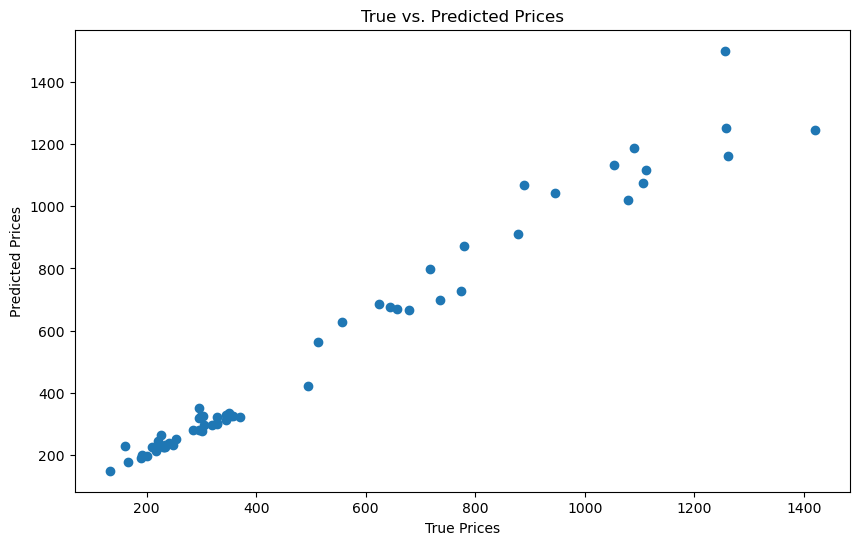

In [8]:
# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error:", loss)

# Make predictions
predictions = model.predict(X_test_scaled)

# Plot the predicted vs. actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs. Predicted Prices')
plt.show()

In [9]:
# Save the model
model.save('trained_model.h5')